In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [56]:
X_data = pd.read_csv('linearX.csv')
Y_data = pd.read_csv('linearY.csv')

In [57]:
X_data['col2'] = Y_data['0.99523']

In [58]:
scaler = MinMaxScaler()
X_data[['9.1', 'col2']] = scaler.fit_transform(X_data[['9.1', 'col2']])


In [59]:
X_data.rename(columns={'9.1': 'col1'}, inplace=True)

In [60]:
X = X_data[['col1']]
y = X_data['col2']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(79, 1) (20, 1) (79,) (20,)


In [63]:
class GradientDescent:
    def __init__(self, learning_rate, epochs):
        """
        Initialize the GradientDescent model.

        Parameters:
        - learning_rate: float, learning rate for gradient updates.
        - epochs: int, number of iterations for training.
        """
        self.slope = 0  # Initial value for the slope (weight)
        self.intercept = 1  # Initial value for the intercept (bias)
        self.learning_rate = learning_rate  # Step size for updates
        self.epochs = epochs  # Total number of iterations
        self.cost_history = []  # To store cost values during training

    def fit(self, X_train, y_train):
        """
        Train the model using batch gradient descent.

        Parameters:
        - X_train: array-like, shape (n_samples,), training feature values.
        - y_train: array-like, shape (n_samples,), training target values.
        """
        # Flatten and convert input to NumPy arrays
        X_train = np.array(X_train).flatten()
        y_train = np.array(y_train)

        # Perform gradient descent for the specified number of epochs
        for epoch in range(self.epochs):
            # Compute predictions
            y_pred = self.slope * X_train + self.intercept

            # Calculate gradients
            slope_gradient = (-2 / len(X_train)) * np.sum((y_train - y_pred) * X_train)
            intercept_gradient = (-2 / len(X_train)) * np.sum(y_train - y_pred)

            # Update parameters
            self.slope -= self.learning_rate * slope_gradient
            self.intercept -= self.learning_rate * intercept_gradient

            # Compute and store the cost
            cost = (1 / len(X_train)) * np.sum((y_train - y_pred) ** 2)
            self.cost_history.append(cost)

        print("Training complete.")
        print(f"Final Parameters: Intercept = {self.intercept}, Slope = {self.slope}")

    def predict(self, X_test):
        """
        Predict target values for given inputs.

        Parameters:
        - X_test: array-like, shape (n_samples,), test feature values.

        Returns:
        - array-like, predicted target values.
        """
        X_test = np.array(X_test).flatten()
        return self.slope * X_test + self.intercept



In [64]:
gd_model = GradientDescent(learning_rate=0.05, epochs=1000)
gd_model.fit(X_train, y_train)

Training complete.
Final Parameters: Intercept = 0.3595876337657565, Slope = 0.5340311098499831


In [65]:
y_predictions = gd_model.predict(X_test)
print(y_predictions)

[0.44859282 0.59518959 0.61089639 0.62136759 0.45906402 0.52189121
 0.46953522 0.44335722 0.67895918 0.49571321 0.40147243 0.44335722
 0.5585404  0.69990158 0.63707439 0.48000641 0.35958763 0.60042519
 0.5323624  0.41194362]


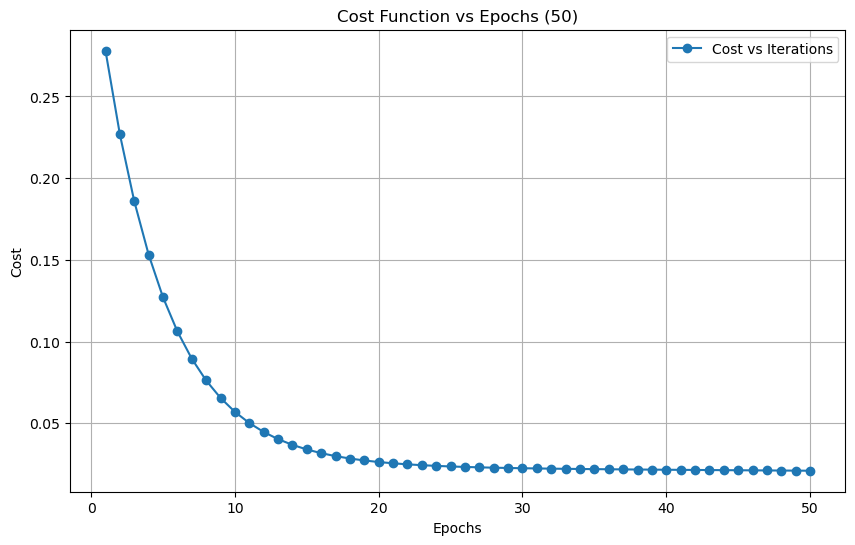

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), gd_model.cost_history[:50], marker='o', label='Cost vs Iterations')
plt.title("Cost Function vs Epochs (50)")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()

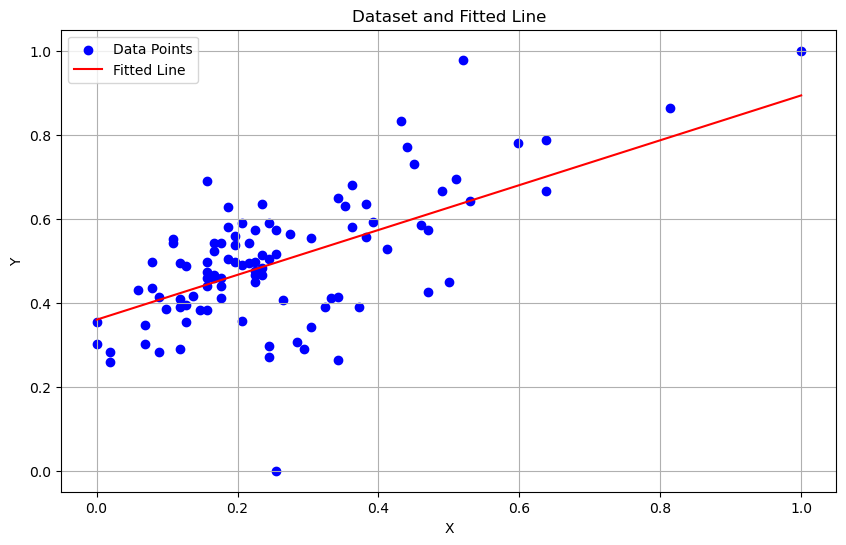

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
X_line = np.linspace(X.min().values[0], X.max().values[0], 100)
y_line = gd_model.slope * X_line + gd_model.intercept
plt.plot(X_line, y_line, color='red', label='Fitted Line')
plt.title("Dataset and Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

In [68]:
learning_rates = [0.005, 0.5, 5]
learning_rate_results = {}

for lr in learning_rates:
    temp_gd_model = GradientDescent(learning_rate=lr, epochs=50)
    temp_gd_model.fit(X_train, y_train)
    learning_rate_results[lr] = temp_gd_model.cost_history

Training complete.
Final Parameters: Intercept = 0.8015755502613965, Slope = -0.04089206765311032
Training complete.
Final Parameters: Intercept = 0.3949459003548616, Slope = 0.3951610173946822
Training complete.
Final Parameters: Intercept = 7.253313538032422e+48, Slope = 1.8467950096214266e+48


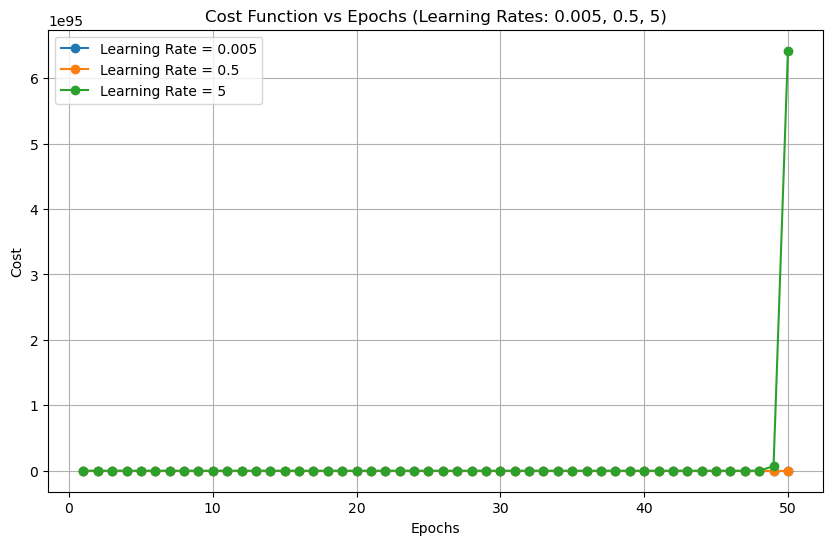

In [69]:
plt.figure(figsize=(10, 6))
for lr, cost_history in learning_rate_results.items():
    plt.plot(range(1, 51), cost_history, marker='o', label=f"Learning Rate = {lr}")
plt.title("Cost Function vs Epochs (Learning Rates: 0.005, 0.5, 5)")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()


In [70]:
class MiniBatchGD(GradientDescent):
    def fit(self, X_train, y_train, batch_size=10):
        X_train = np.array(X_train).flatten()
        y_train = np.array(y_train)
        n = len(X_train)
        
        for epoch in range(self.epochs):
            for batch_start in range(0, n, batch_size):
                X_batch = X_train[batch_start:batch_start + batch_size]
                y_batch = y_train[batch_start:batch_start + batch_size]
                
                y_pred = self.slope * X_batch + self.intercept
                slope_grad = (-2 / len(X_batch)) * np.sum((y_batch - y_pred) * X_batch)
                intercept_grad = (-2 / len(X_batch)) * np.sum(y_batch - y_pred)
                self.slope -= self.learning_rate * slope_grad
                self.intercept -= self.learning_rate * intercept_grad
                
            cost = (1 / n) * np.sum((y_train - (self.slope * X_train + self.intercept)) ** 2)
            self.cost_history.append(cost)

In [71]:
mini_batch_gd = MiniBatchGD(learning_rate=0.5, epochs=50)
mini_batch_gd.fit(X_train, y_train, batch_size=10)

In [93]:
class StochasticGD(GradientDescent):
    def fit(self, X_train, y_train):
        X_train = np.array(X_train).flatten()
        y_train = np.array(y_train)
        n = len(X_train)
        
        for epoch in range(self.epochs):
            for i in range(n):
                X_single = X_train[i]
                y_single = y_train[i]
                
                y_pred = self.slope * X_single + self.intercept
                slope_grad = -2 * (y_single - y_pred) * X_single
                intercept_grad = -2 * (y_single - y_pred)
                
                self.slope -= self.learning_rate * slope_grad
                self.intercept -= self.learning_rate * intercept_grad
                
            cost = (1 / n) * np.sum((y_train - (self.slope * X_train + self.intercept)) ** 2)
            self.cost_history.append(cost)


In [73]:
stochastic_gd_model = StochasticGD(learning_rate=0.5, epochs=50)
stochastic_gd_model.fit(X_train, y_train)

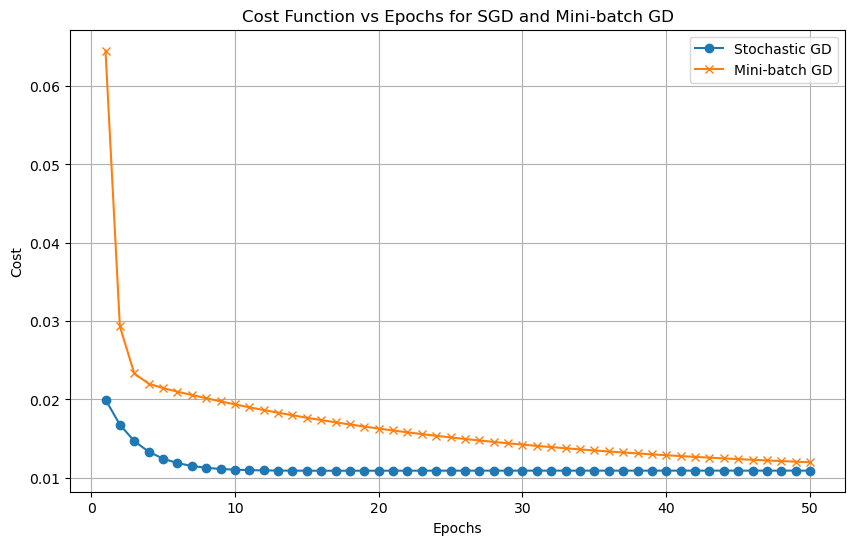

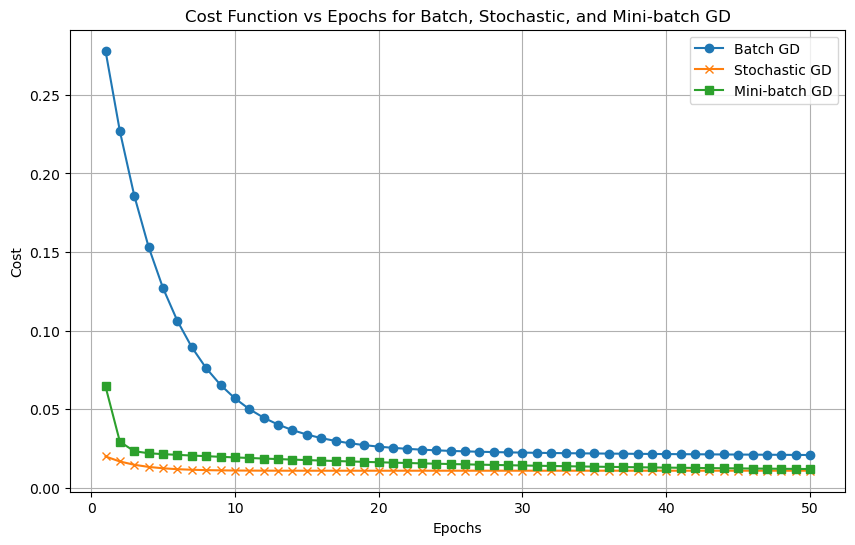

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


class BatchGD:
    def __init__(self, learning_rate, epochs):
        self.slope = 0
        self.intercept = 1
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost_history = []
    
    def fit(self, X_train, y_train):
        X_train = np.array(X_train).flatten()
        y_train = np.array(y_train)
        n = len(X_train)
        
        for epoch in range(self.epochs):
            y_pred = self.slope * X_train + self.intercept
            slope_grad = (-2 / n) * np.sum((y_train - y_pred) * X_train)
            intercept_grad = (-2 / n) * np.sum(y_train - y_pred)
            
            self.slope -= self.learning_rate * slope_grad
            self.intercept -= self.learning_rate * intercept_grad
            
            cost = (1 / n) * np.sum((y_train - y_pred) ** 2)
            self.cost_history.append(cost)


class StochasticGD:
    def __init__(self, learning_rate, epochs):
        self.slope = 0
        self.intercept = 1
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost_history = []
    
    def fit(self, X_train, y_train):
        X_train = np.array(X_train).flatten()
        y_train = np.array(y_train)
        n = len(X_train)
        
        for epoch in range(self.epochs):
            for i in range(n):
                X_single = X_train[i]
                y_single = y_train[i]
                
                y_pred = self.slope * X_single + self.intercept
                slope_grad = -2 * (y_single - y_pred) * X_single
                intercept_grad = -2 * (y_single - y_pred)
                
                self.slope -= self.learning_rate * slope_grad
                self.intercept -= self.learning_rate * intercept_grad
                
            cost = (1 / n) * np.sum((y_train - (self.slope * X_train + self.intercept)) ** 2)
            self.cost_history.append(cost)


class MiniBatchGD:
    def __init__(self, learning_rate, epochs, batch_size=10):
        self.slope = 0
        self.intercept = 1
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.cost_history = []
    
    def fit(self, X_train, y_train):
        X_train = np.array(X_train).flatten()
        y_train = np.array(y_train)
        n = len(X_train)
        
        for epoch in range(self.epochs):
            for batch_start in range(0, n, self.batch_size):
                X_batch = X_train[batch_start:batch_start + self.batch_size]
                y_batch = y_train[batch_start:batch_start + self.batch_size]
                
                y_pred = self.slope * X_batch + self.intercept
                slope_grad = (-2 / len(X_batch)) * np.sum((y_batch - y_pred) * X_batch)
                intercept_grad = (-2 / len(X_batch)) * np.sum(y_batch - y_pred)
                
                self.slope -= self.learning_rate * slope_grad
                self.intercept -= self.learning_rate * intercept_grad
                
            cost = (1 / n) * np.sum((y_train - (self.slope * X_train + self.intercept)) ** 2)
            self.cost_history.append(cost)


learning_rate = 0.05
epochs = 50


batch_gd_model = BatchGD(learning_rate=learning_rate, epochs=epochs)
batch_gd_model.fit(X_train, y_train)

stochastic_gd_model = StochasticGD(learning_rate=learning_rate, epochs=epochs)
stochastic_gd_model.fit(X_train, y_train)

mini_batch_gd_model = MiniBatchGD(learning_rate=learning_rate, epochs=epochs, batch_size=10)
mini_batch_gd_model.fit(X_train, y_train)


plt.figure(figsize=(10, 6))


plt.plot(range(1, epochs + 1), batch_gd_model.cost_history, marker='o', label='Batch GD')


plt.plot(range(1, epochs + 1), stochastic_gd_model.cost_history, marker='x', label='Stochastic GD')


plt.plot(range(1, epochs + 1), mini_batch_gd_model.cost_history, marker='s', label='Mini-batch GD')

plt.title("Cost Function vs Epochs for Batch, Stochastic, and Mini-batch GD")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()
